In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from os import listdir

In [2]:
def get_trial_pos_in_block(block_type,block_index,df,pos=None):
    pos = np.zeros_like(df.BlockType)*0.
    mask = np.logical_and(df.BlockType==block_type,df.BlockIndex==block_index)
    pos[mask] = (np.arange(np.sum(mask))+1)/np.sum(mask)
    return pos
def foldnmap(xs,func):
    return np.array([func(xs[:i+1]) for i in range(len(xs))])
def get_accuracy_in_block(block_type,block_index,df):
    pos = np.zeros_like(df.BlockType)*0.
    mask = np.logical_and(df.BlockType==block_type,df.BlockIndex==block_index)
    pos[mask] = foldnmap(df[mask].FeedbackType=='positive',lambda x: sum(x)/len(x))
    return pos
def read_metadata(f):
    df = pd.read_csv(f)
    df = df.sort_values(by='LockSample')
    if 'BlockType' in df.columns:
        pos_func = lambda x: 'Begin' if x < .34 else 'Middle' if x < .67 else 'End'
        acc_func = lambda x: sum(x)/len(x)
        df['BlockPercent']=np.sum([get_trial_pos_in_block(a,b,df) for a,b in zip(['visual/right','visual/right','visual/left','visual/left','auditive/right','auditive/right','auditive/left','auditive/left'],[1,2,1,2,1,2,1,2])],axis=0)

        df['BlockPosition']= df.apply(lambda x: pos_func(x.BlockPercent),axis=1)
        ## Get each block, per index 
        df['BlockAccuracy']=np.sum([get_accuracy_in_block(a,b,df) for a,b in zip(['visual/right','visual/right','visual/left','visual/left','auditive/right','auditive/right','auditive/left','auditive/left'],[1,2,1,2,1,2,1,2])],axis=0)
        df['TotalAccuracy'] = foldnmap(df.FeedbackType=='positive',lambda x: sum(x)/len(x))
        df['TotalPercent'] = np.arange(1,len(df)+1)/len(df)
        df['Subject'] = f.split('/')[-1].split('.')[0]
        return df

In [3]:
d = "../../data/reinhartlab/multimodal/csv/"
files = [c for c in listdir(d) if '.csv' in c and 'stimulus' in c]
dfs = pd.concat([read_metadata(d+f) for f in files])
dfs['Correctness'] =(dfs['FeedbackType']=='positive')*1.
dfs.query('BlockIndex > 0').head()

,Unnamed: 0,LockType,LockSample,BlockType,BlockIndex,StimulusType,ResponseType,ResponseTimes,FeedbackType,TrialEvents,BlockPercent,BlockPosition,BlockAccuracy,TotalAccuracy,TotalPercent,Subject,Correctness
0,28,stimulus,440342,visual/left,1,0,NaN,NaN,neutral,"OrderedDict([('Stim/S 9', 439801), ('Stim/S 1...",0.00657895,Begin,0,0.0,0.000822,multimodal_eeg_060CG,0.0
608,10804,stimulus,446825,auditive/right,1,1000,NaN,NaN,neutral,"OrderedDict([('Stim/S 9', 446152), ('Stim/S 1...",0.00657895,Begin,0,0.0,0.001645,multimodal_eeg_060CG,0.0
609,10811,stimulus,453023,auditive/right,1,500,NaN,NaN,neutral,"OrderedDict([('Stim/S 9', 452496), ('Stim/S 1...",0.0131579,Begin,0,0.0,0.002467,multimodal_eeg_060CG,0.0
1,49,stimulus,459421,visual/left,1,45,R/left,1.593,negative,"OrderedDict([('Stim/S 9', 458827), ('Stim/S 1...",0.0131579,Begin,0,0.0,0.003289,multimodal_eeg_060CG,0.0
2,58,stimulus,463329,visual/left,1,45,R/left,1.805,negative,"OrderedDict([('Stim/S 9', 462731), ('Stim/S 1...",0.0197368,Begin,0,0.0,0.004112,multimodal_eeg_060CG,0.0


In [14]:
dfs.query('Subject=="MulitModal_EEG_078CG" & BlockType == "visual/left"').head(100)

,Unnamed: 0,LockType,LockSample,BlockType,BlockIndex,StimulusType,ResponseType,ResponseTimes,FeedbackType,TrialEvents,BlockPercent,BlockPosition,BlockAccuracy,TotalAccuracy,TotalPercent,Subject,Correctness
0,29,stimulus,339215,visual/left,1,0,R/down,3.007,negative,"OrderedDict([('Stim/S 9', 338530), ('Stim/S 1...",0.00657895,Begin,0,0.000000,0.000822,MulitModal_EEG_078CG,0.0
1,38,stimulus,344524,visual/left,1,45,R/right,2.330,negative,"OrderedDict([('Stim/S 9', 343950), ('Stim/S 1...",0.0131579,Begin,0,0.000000,0.001645,MulitModal_EEG_078CG,0.0
2,54,stimulus,355209,visual/left,1,135,R/right,1.269,negative,"OrderedDict([('Stim/S 9', 354635), ('Stim/S 1...",0.0197368,Begin,0,0.000000,0.003289,MulitModal_EEG_078CG,0.0
3,63,stimulus,358909,visual/left,1,90,R/down,1.729,negative,"OrderedDict([('Stim/S 9', 358376), ('Stim/S 1...",0.0263158,Begin,0,0.000000,0.004112,MulitModal_EEG_078CG,0.0
4,72,stimulus,362999,visual/left,1,0,R/up,1.995,negative,"OrderedDict([('Stim/S 9', 362411), ('Stim/S 1...",0.0328947,Begin,0,0.000000,0.004934,MulitModal_EEG_078CG,0.0
5,81,stimulus,367486,visual/left,1,45,R/right,1.856,negative,"OrderedDict([('Stim/S 9', 366883), ('Stim/S 1...",0.0394737,Begin,0,0.000000,0.005757,MulitModal_EEG_078CG,0.0
6,108,stimulus,380149,visual/left,1,45,R/right,1.833,negative,"OrderedDict([('Stim/S 9', 379500), ('Stim/S 1...",0.0460526,Begin,0,0.000000,0.008224,MulitModal_EEG_078CG,0.0
7,135,stimulus,393442,visual/left,1,135,R/up,1.564,negative,"OrderedDict([('Stim/S 9', 392893), ('Stim/S 1...",0.0526316,Begin,0,0.000000,0.010691,MulitModal_EEG_078CG,0.0
8,144,stimulus,397284,visual/left,1,45,R/up,1.250,negative,"OrderedDict([('Stim/S 9', 396639), ('Stim/S 1...",0.0592105,Begin,0,0.000000,0.011513,MulitModal_EEG_078CG,0.0
9,153,stimulus,400898,visual/left,1,135,R/left,1.620,negative,"OrderedDict([('Stim/S 9', 400314), ('Stim/S 1...",0.0657895,Begin,0,0.000000,0.012336,MulitModal_EEG_078CG,0.0


In [5]:
df_stats = dfs.groupby(['Subject']).describe()
corr_stats = df_stats['Correctness']['mean'].describe()
corr_stats

count    28.000000
mean      0.526771
std       0.267911
min       0.052239
25%       0.348038
50%       0.555921
75%       0.789321
max       0.890678
Name: mean, dtype: float64

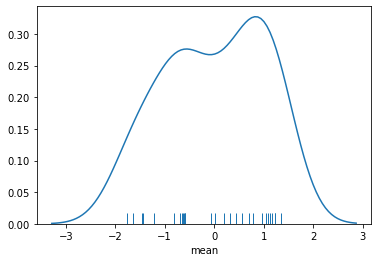

In [6]:
sb.distplot((df_stats['Correctness']['mean']-corr_stats['mean'])/corr_stats['std'],rug=True,hist=False);

In [7]:
(df_stats['Correctness']['mean']-corr_stats['mean'])/corr_stats['std']

Subject
MulitModal_EEG_058CG         1.219987
MulitModal_EEG_069CG        -0.633466
MulitModal_EEG_076CG        -1.771230
MulitModal_EEG_078CG        -0.658583
MulitModal_EEG_094CG         1.048564
MulitModal_EEG_095part2CG    0.957137
MulitModal_EEG_099CG         1.358315
MulitModal_EEG_102CG         1.164735
MulitModal_EEG_113CG        -0.692787
MulitModal_EEG_113CG_2      -0.806088
MultiModal_EEGTest_054CG    -0.600262
MultiModal_EEGTest_066CG    -1.468947
MultiModal_EEGTest_071CG    -1.209058
MultiModal_EEGTest_073CG    -0.603243
MultiModal_EEG_091CG        -1.650051
multimodal_eeg_049CG         1.084927
multimodal_eeg_053CG         0.323676
multimodal_eeg_055CG        -1.448297
multimodal_eeg_056CG        -0.058989
multimodal_eeg_060CG        -0.591053
multimodal_eeg_061CG         1.121761
multimodal_eeg_062CG         0.780799
multimodal_eeg_063CG         0.695093
multimodal_eeg_068CG         0.553893
multimodal_eeg_081CG         1.225237
multimodal_eeg_087CG         0.200893
mult

## Group analyses

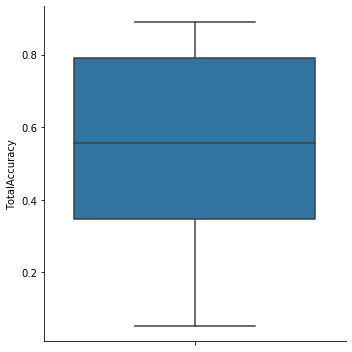

In [246]:
# Group response accuracies
sb.catplot(y='TotalAccuracy',data=dfs.query('TotalPercent==1. & TotalAccuracy>=0'),kind='box');

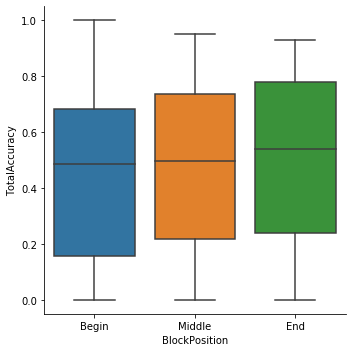

In [245]:
# Group response accuracies by block
sb.catplot(x='BlockPosition',y='TotalAccuracy',data=dfs.query('TotalAccuracy>=0'),kind='box',order=['Begin','Middle','End']);

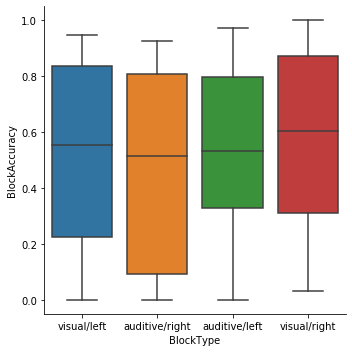

In [244]:
# Group response accuracies by condition
sb.catplot(x='BlockType',y='BlockAccuracy',data=dfs.query('BlockPercent==1. & BlockAccuracy>=0'),kind='box');

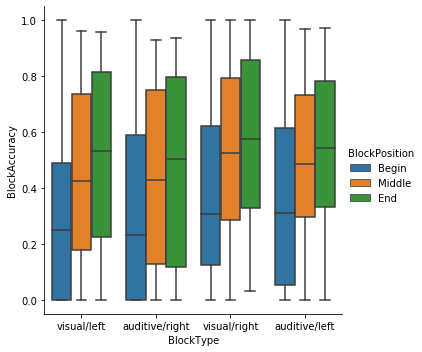

In [247]:
# Group response accuracies by condition and block
sb.catplot(x='BlockType',y='BlockAccuracy',hue='BlockPosition',hue_order=['Begin','Middle','End'],data=dfs.query('BlockAccuracy>=0'),kind='box');

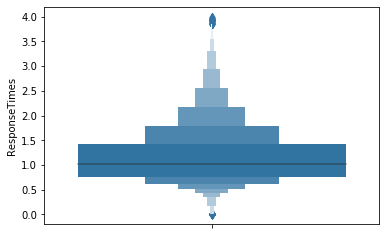

In [237]:
# Group response times
sb.boxenplot(y='ResponseTimes',data=dfs.query('ResponseTimes > 0'));

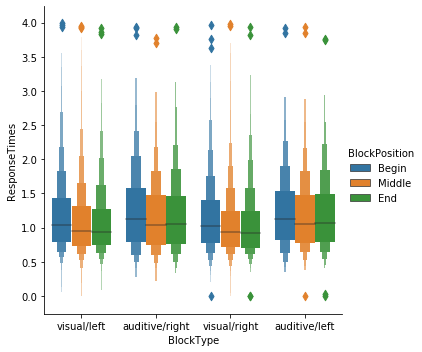

In [213]:
# Group response times by conditions and block position
sb.catplot(x='BlockType',y='ResponseTimes',hue='BlockPosition',data=dfs.query('ResponseTimes > 0'),kind='boxen');

## Subject analyses

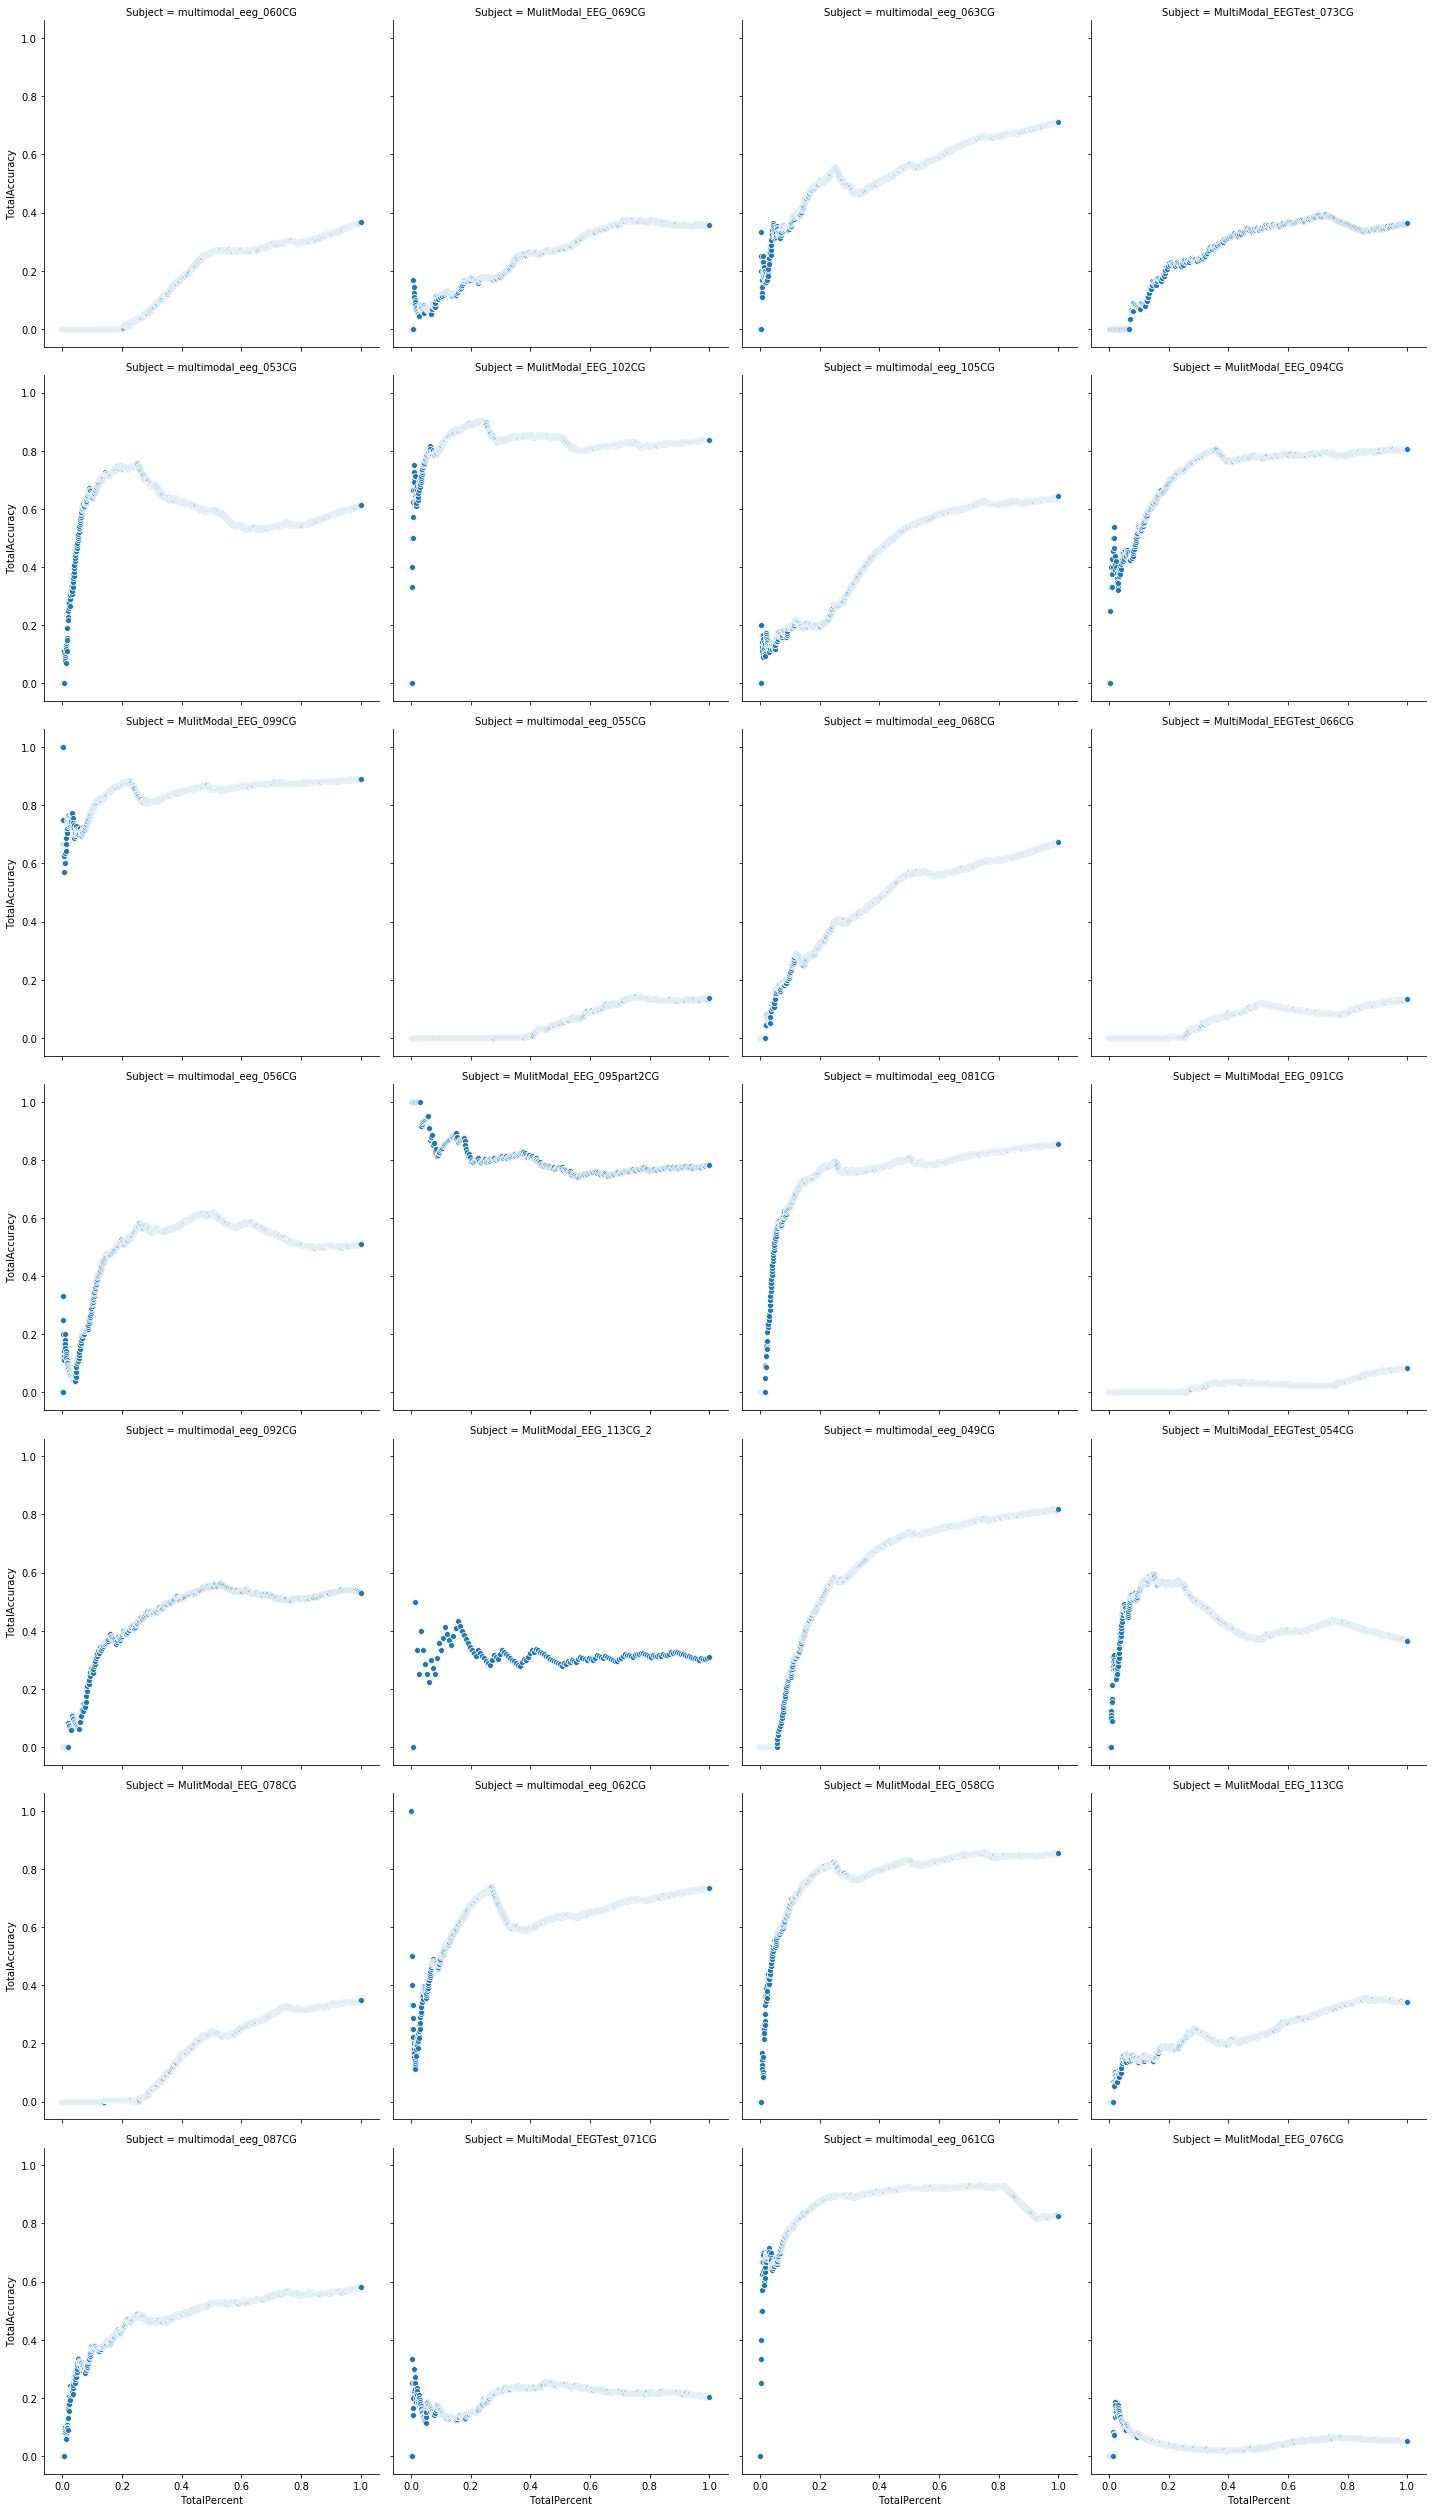

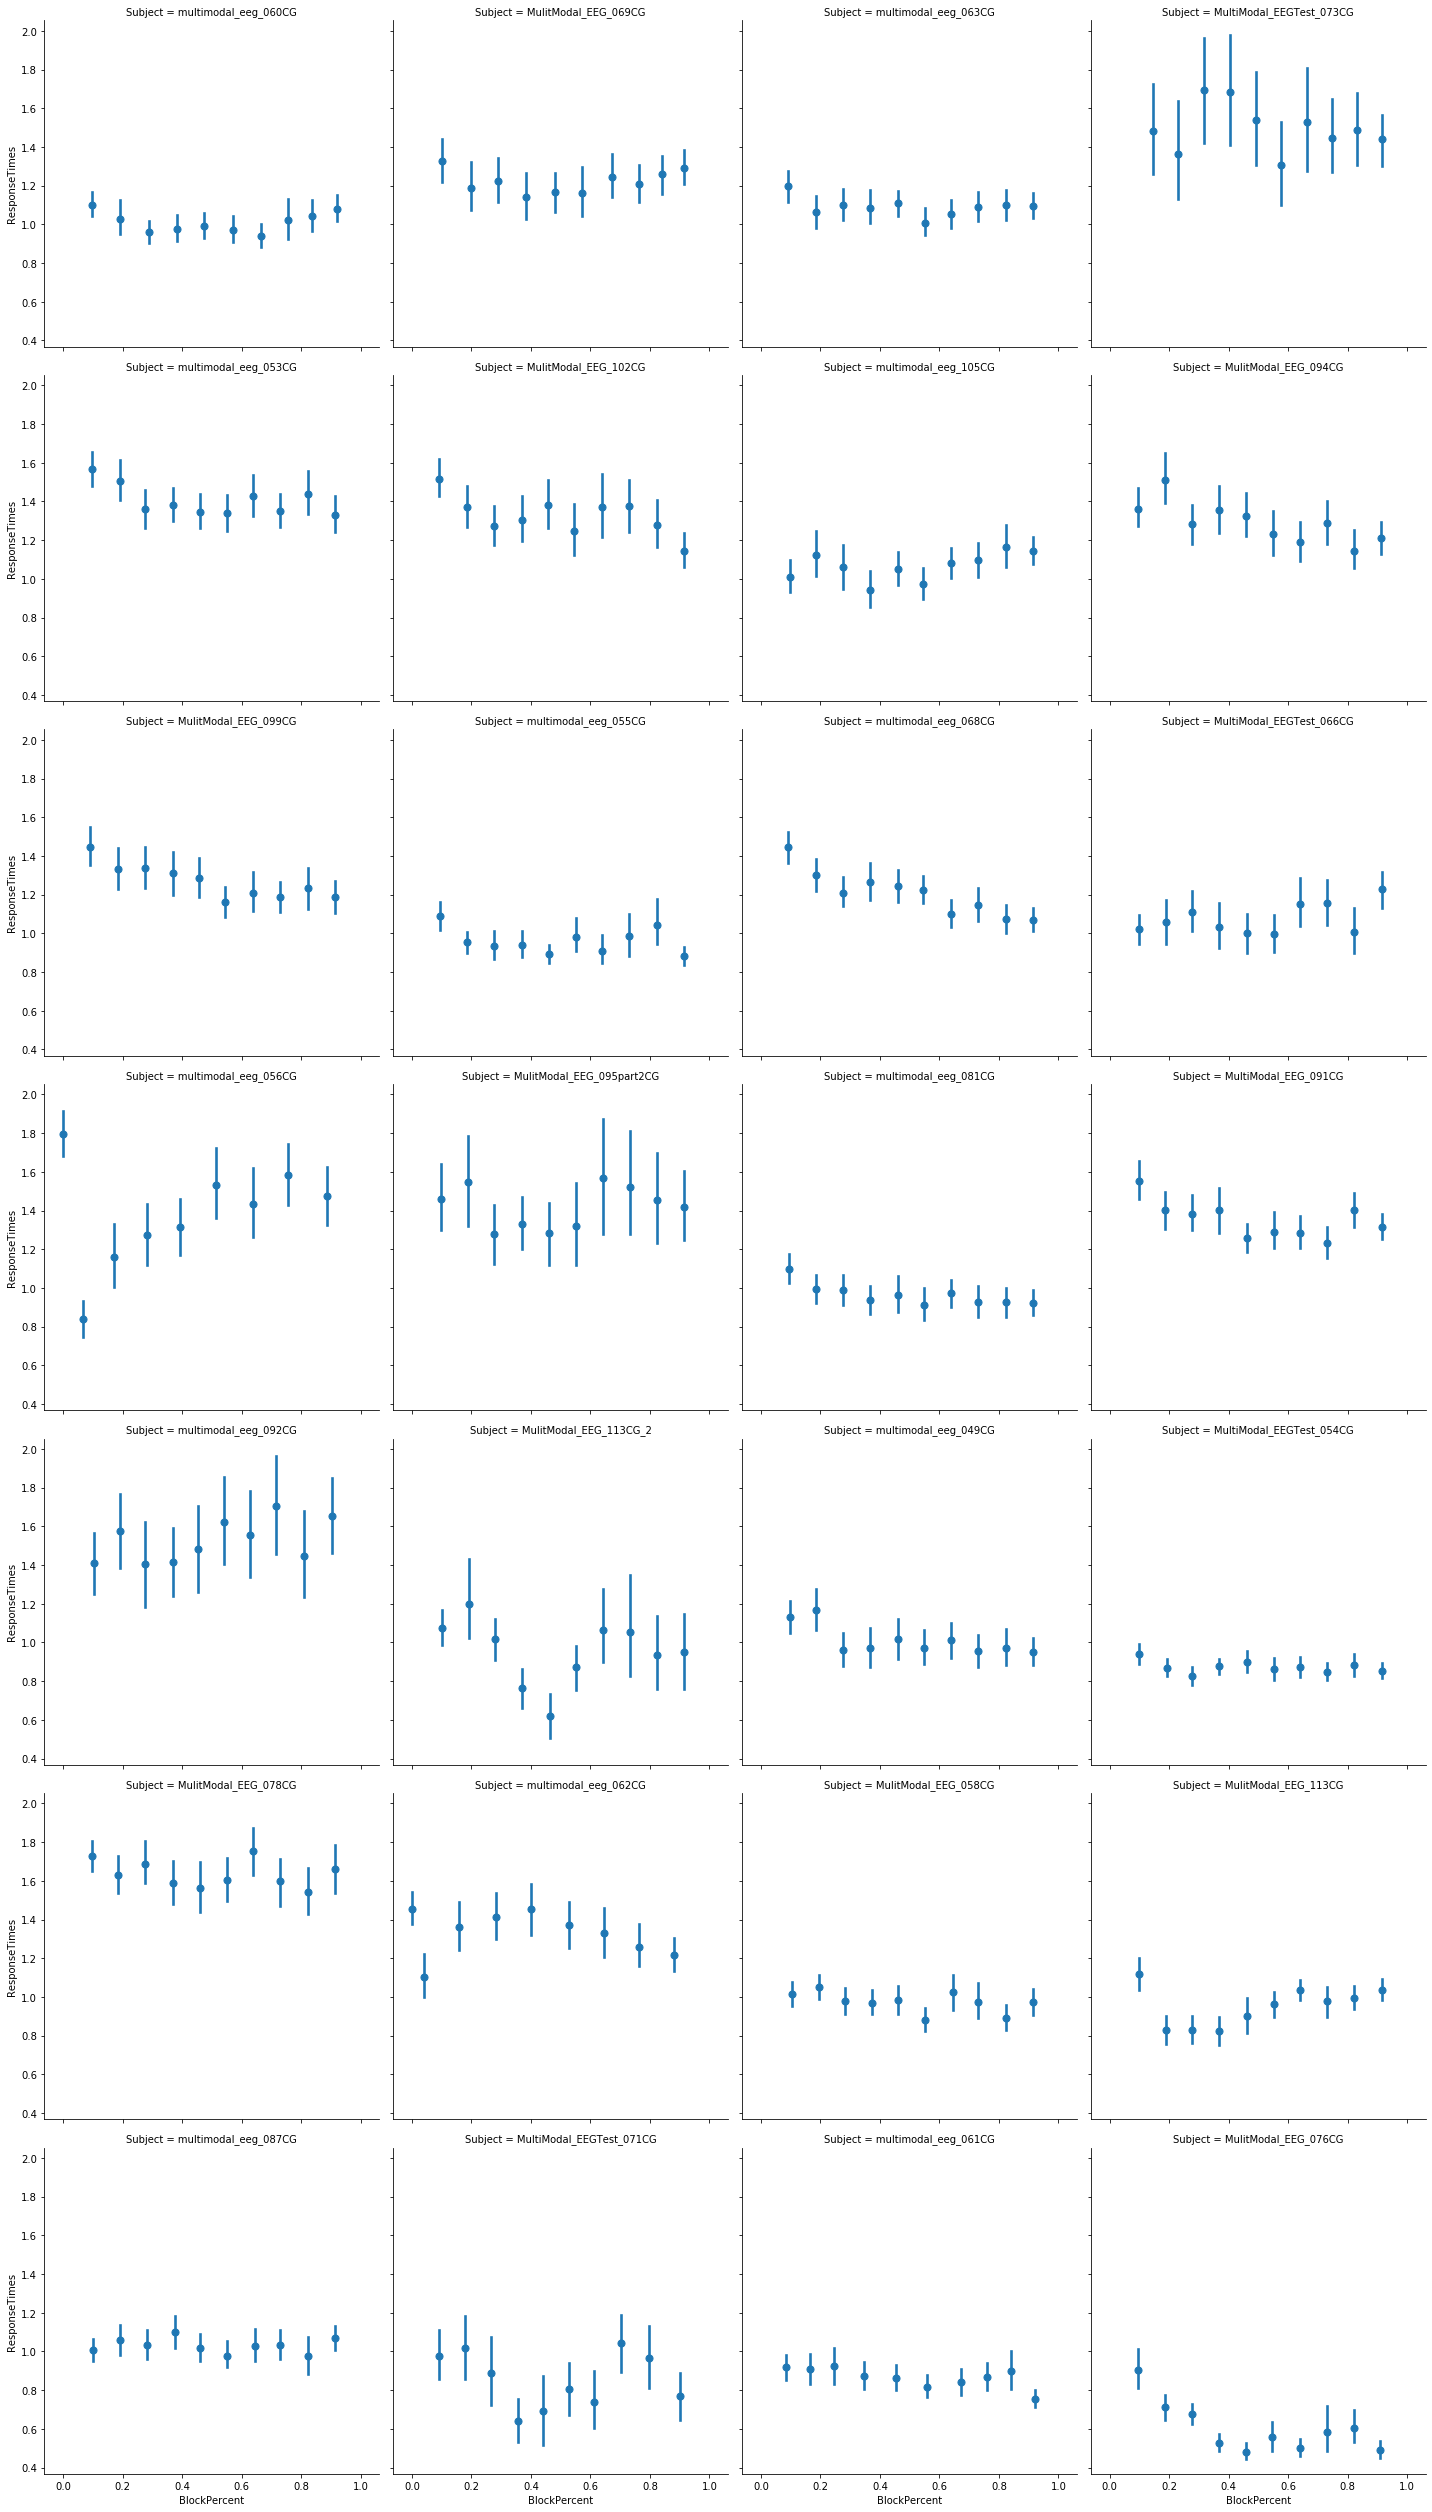

In [203]:
# Subject total accuracies and response times
sb.relplot(x='TotalPercent',y='TotalAccuracy',col='Subject',col_wrap=4,data=dfs);
sb.lmplot(x='BlockPercent',y='ResponseTimes',col='Subject',col_wrap=4,data=dfs.query('ResponseTimes>0'),x_bins=10,fit_reg=False);

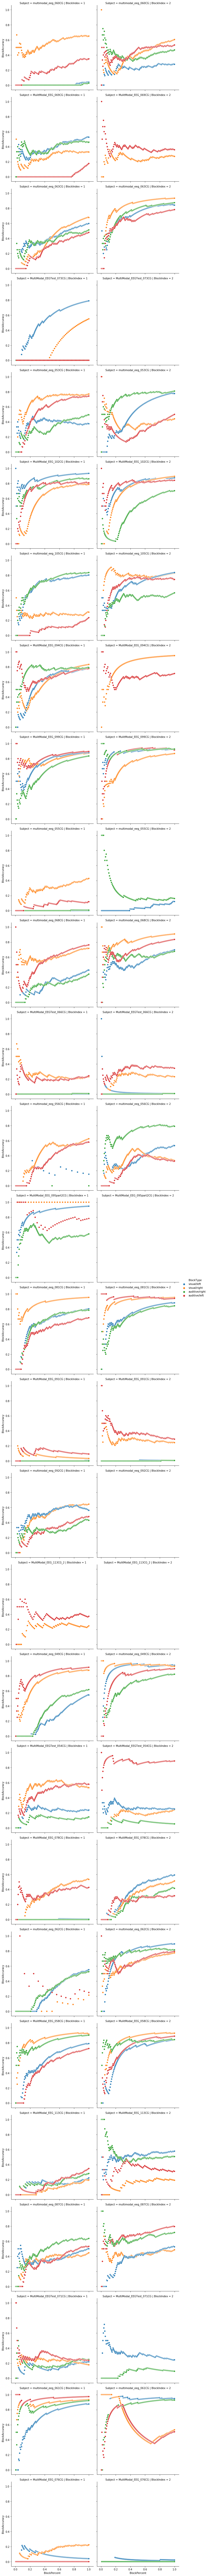

In [175]:
# Subject accuracies by conditions
sb.relplot(x='BlockPercent',y='BlockAccuracy',hue='BlockType',col='BlockIndex',row='Subject',data=dfs.query('BlockIndex<3'));

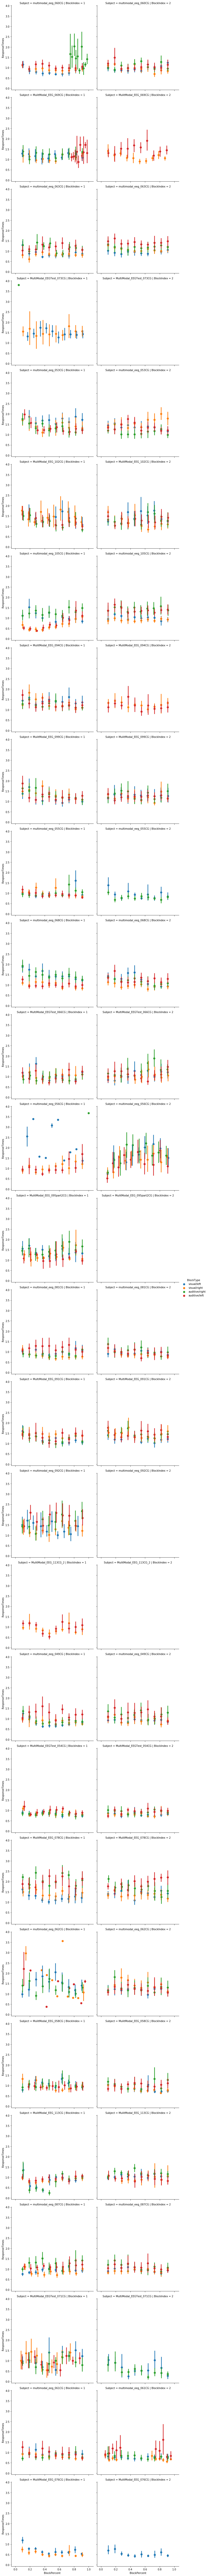

In [177]:
# Subject response times by conditions
sb.lmplot(x='BlockPercent',y='ResponseTimes',hue='BlockType',col='BlockIndex',row='Subject',data=dfs.query('BlockIndex<3 & ResponseTimes>0'),x_bins=10,fit_reg=False,x_jitter=.05);